# **Đại học Tôn Đức Thắng**
Khoa Công nghệ thông tin
NHẬP MÔN XỬ LÝ ẢNH SỐ
---
    Thành viên:
      Nguyễn Sang Sinh - 51900771
      Nguyễn Anh Duy – 51703067
      Lê Tuấn - 51900270

## Pytesseract OCR

### Cài đặt thư viện Tesseract-OCR và Keras-OCR

In [ ]:
!pip install pytesseract
!apt install tesseract-ocr
!pip install keras-ocr

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=188ee98b171c5e387b1616c2be080e9eec81bfe172935cdbc814ed119f2f7b68
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http:/

### Pytesseract-OCR

In [ ]:
#Import thư viện và imread hình ảnh input đầu vào
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import pytesseract
image = cv2.imread('/content/testcase.png') 

In [ ]:
#Hàm detect area contour
def detect_area_contours(img):
  #Convert img BGR sang gray
  result = img.copy()
  gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

  #Làm mờ Gaussian Blur, giảm các chi tiết và nhiễu ảnh
  blur = cv2.GaussianBlur(gray, (7,7), 0)

  #Đưa ảnh về binary bằng threshold otsu
  thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  #Tạo cấu trúc shape hình chữ nhật và giãn nở hình ảnh (dilate)
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6,5))
  dilate = cv2.dilate(thresh, kernel, iterations=6)

  #Tìm contour và vẽ rectangle cho mỗi contour tìm được
  cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]

  for c in cnts:
      x,y,w,h = cv2.boundingRect(c)
      cv2.rectangle(result, (x, y), (x + w, y + h), (0, 0, 0), 2)

  return result, cnts[::-1]

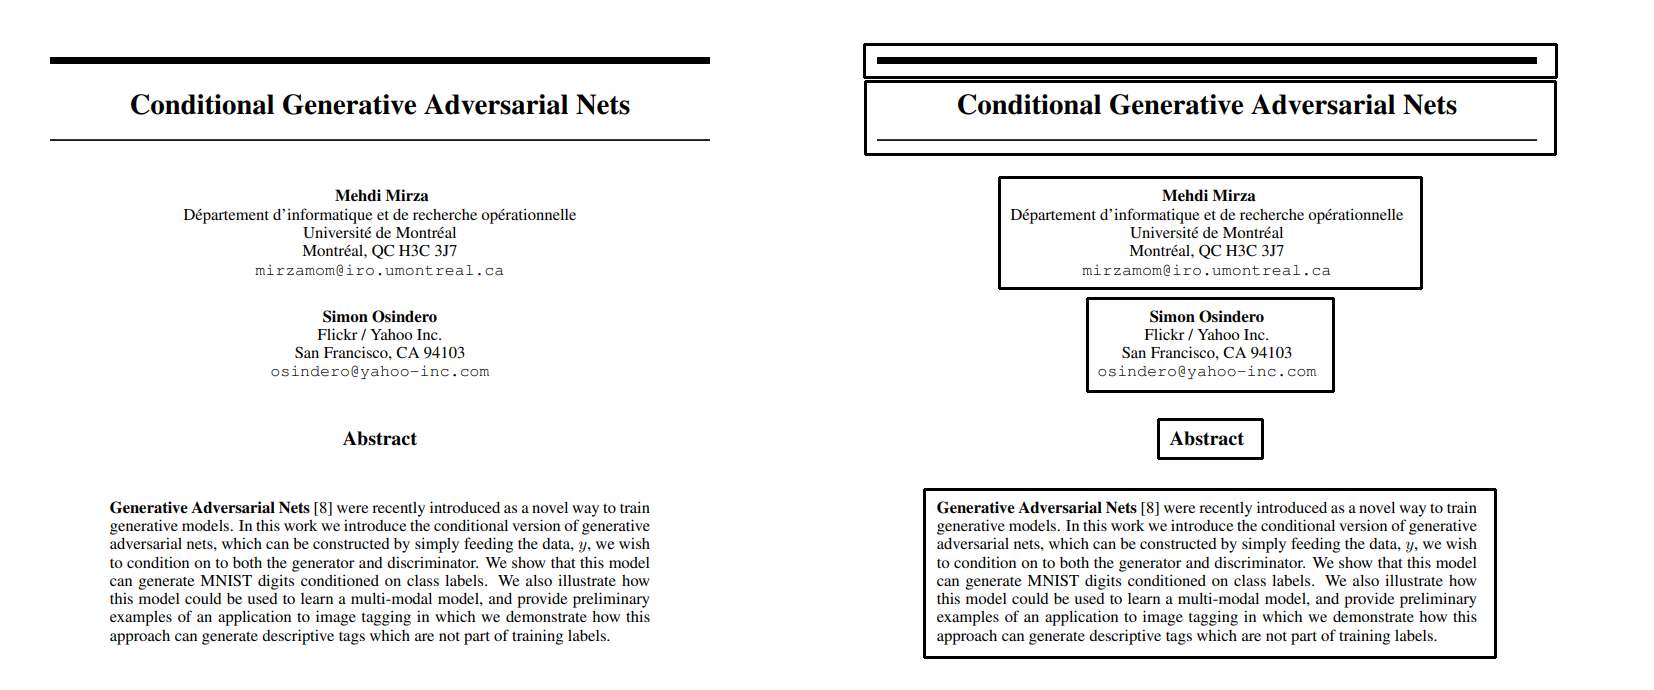

In [ ]:
#Detect area contours và hiển thị hình ảnh
img_detect_cnts, cnts = detect_area_contours(image)
cv2_imshow( np.hstack((image, img_detect_cnts)) )

In [ ]:
#Hàm detect text từ img đầu vào
def detect_text(img):

  #Tạo img result để trả về
  result_img = img.copy()
  heigh, weight, c = img.shape

  #Trích xuất box text từ Pytesseract
  extracted_box = pytesseract.image_to_boxes(img)

  #Với mỗi box được trích xuất, vẽ rectangle bao quanh text được detect
  for box in extracted_box.splitlines():
        box = box.split()
        x,y,w,h= int(box[1]), int(box[2]), int(box[3]), int(box[4])
        cv2.rectangle(result_img, (x, heigh-y), (w, heigh-h), (0, 255, 0), 1)

  return result_img

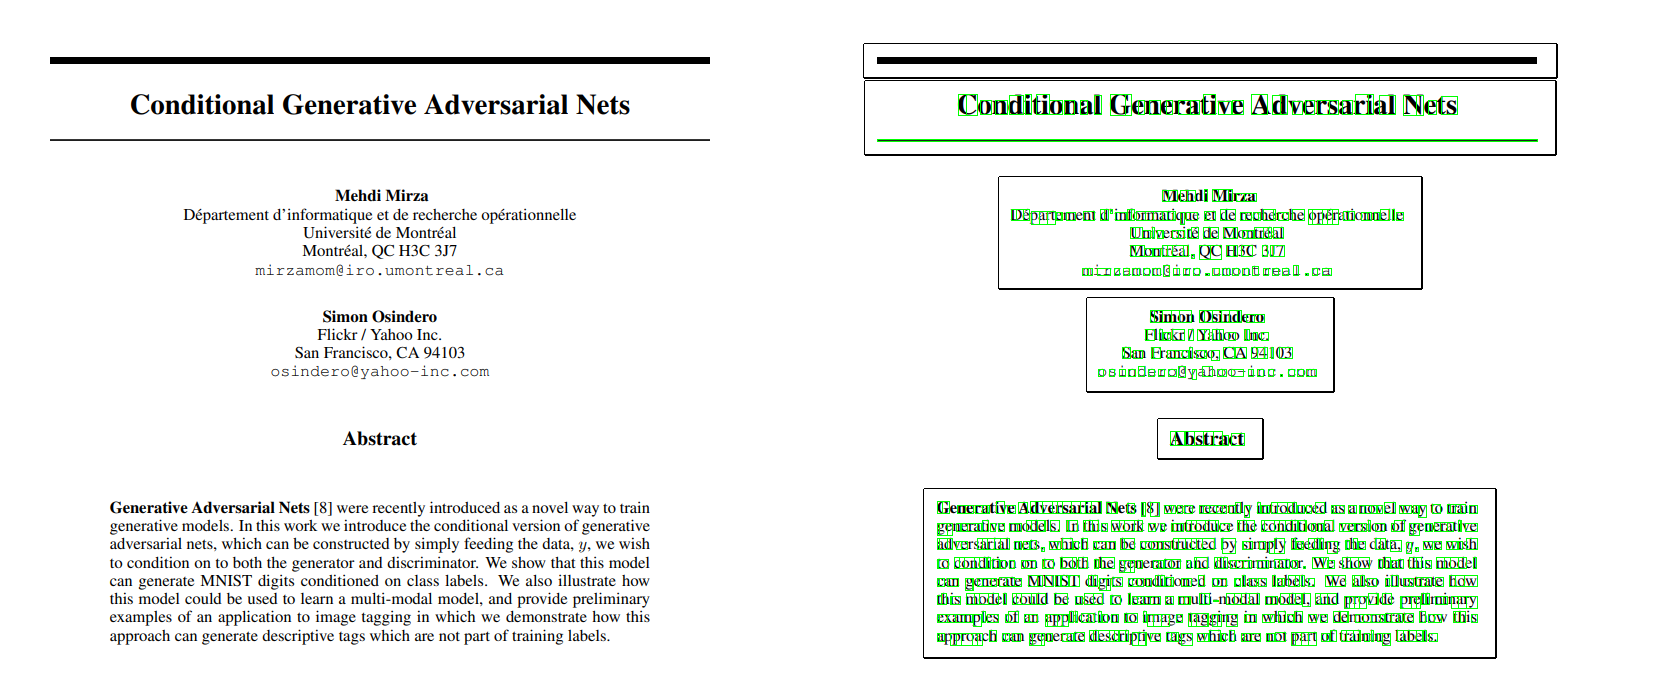

In [ ]:
#Với mỗi contours tìm được ở trên, detect text có trong contour
for c in cnts:
  x,y,w,h = cv2.boundingRect(c)
  img_text_detect = detect_text(image[y:y+h,x:x+w])
  img_detect_cnts[y:y+h,x:x+w] = img_text_detect

cv2_imshow( np.hstack((image, img_detect_cnts)) )

In [ ]:
#Hàm text recognition trích xuất text có trong từng contour
def text_recognition(img, cnts):

  #Khởi tạo mảng text để trả về
  result = []

  #Với mỗi contour, recognize text 
  for c in cnts:
      x,y,w,h = cv2.boundingRect(c)
      extracted_text = pytesseract.image_to_string(image[y:y+h, x:x + w])
      result.append(extracted_text.replace(' \n', '').replace('\x0c', ''))
  return result

In [ ]:
#Hàm viết file txt
def write_txt(text, file_name):
  with open(file_name, 'w') as f:
    for line in text:
          f.write(line)
          f.write('\n')

In [ ]:
result = text_recognition(image, cnts)
file_name = 'output_tesseract.txt'
write_txt(result, file_name)
for line in result:
  print(line)


Conditional Generative Adversarial Nets


Mehdi Mirza
Département d’informatique et de recherche opérationnelle
Université de Montréal
Montréal, QC H3C 3)7
mirzamom@iro.umontreal.ca

Simon Osindero
Flickr / Yahoo Inc.
San Francisco, CA 94103
osindero@yahoo-inc.com

Abstract

Generative Adversarial Nets [8] were recently introduced as a novel way to train
generative models. In this work we introduce the conditional version of generative
adversarial nets, which can be constructed by simply feeding the data, y, we wish
to condition on to both the generator and discriminator. We show that this model
can generate MNIST digits conditioned on class labels. We also illustrate how
this model could be used to learn a multi-modal model, and provide preliminary
examples of an application to image tagging in which we demonstrate how this
approach can generate descriptive tags which are not part of training labels.



## Other method - Keras OCR

In [ ]:
import keras_ocr 

In [ ]:
#Hàm detect area contour
def detect_area_contours(img):
  #Convert img BGR sang gray
  result = img.copy()
  gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

  #Làm mờ Gaussian Blur, giảm các chi tiết và nhiễu ảnh
  blur = cv2.GaussianBlur(gray, (7,7), 0)

  #Đưa ảnh về binary bằng threshold otsu
  thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  #Tạo cấu trúc shape hình chữ nhật và giãn nở hình ảnh (dilate)
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,2))
  dilate = cv2.dilate(thresh, kernel, iterations=4)

  #Tìm contour và vẽ rectangle cho mỗi contour tìm được
  cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]

  for c in cnts:
      x,y,w,h = cv2.boundingRect(c)
      cv2.rectangle(result, (x, y), (x + w, y + h), (0, 0, 0), 2)

  return result, cnts[::-1]

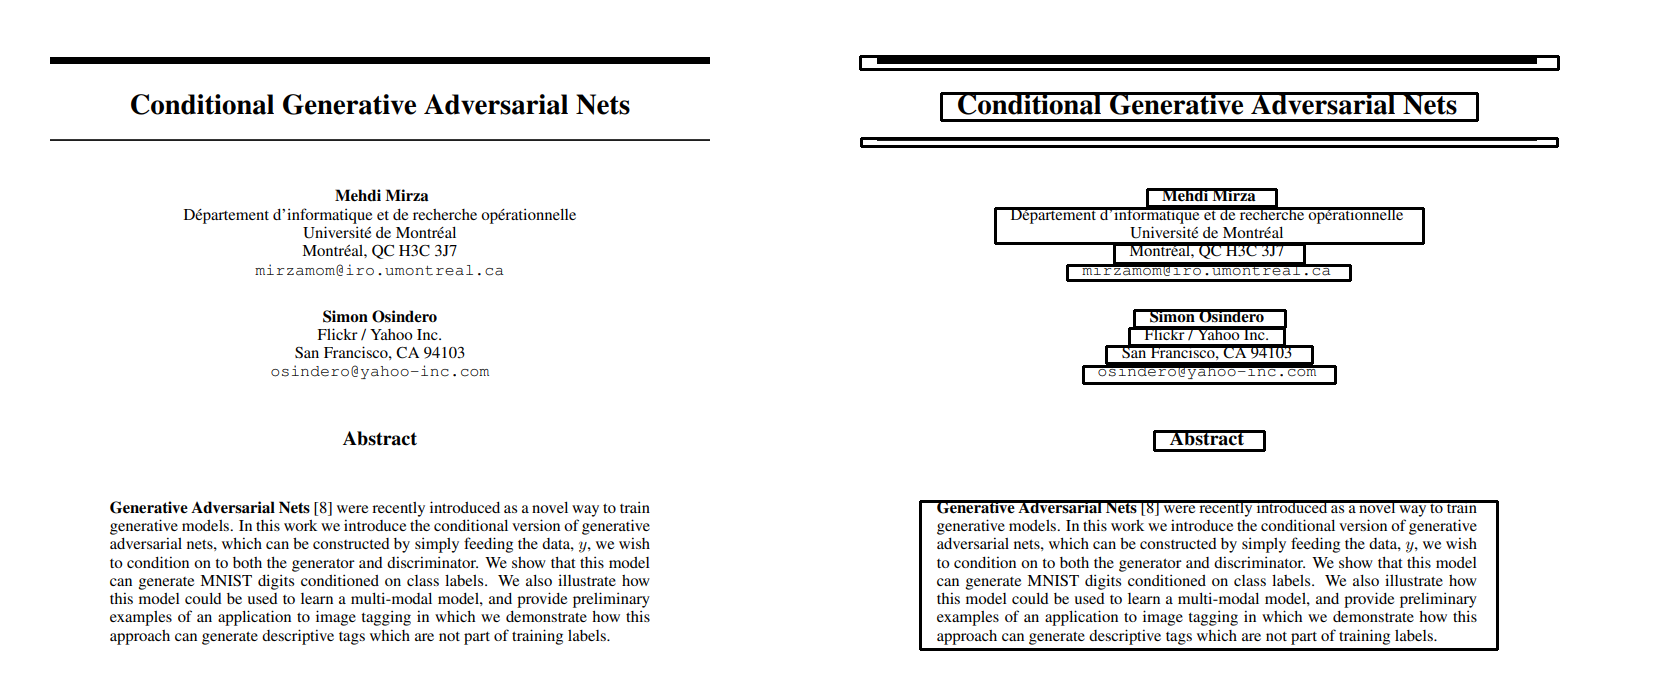

In [ ]:
#Detect area contours và hiển thị hình ảnh
img_detect_cnts, cnts = detect_area_contours(image)r
cv2_imshow( np.hstack((image, img_detect_cnts)) )

In [ ]:
#Tạo mảng images từ coutour đã tìm được
img = image.copy()
images = []

for c in cnts:
  x,y,w,h = cv2.boundingRect(c)
  images.append(img[y:y+h,x:x+w])

In [ ]:
#Khởi tạo pipeline từ Keras OCR
pipeline = keras_ocr.pipeline.Pipeline()

#Recognize text 
prediction_groups = pipeline.recognize(images)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
#Hàm detect text trích xuất box từ keras
def detect_text_keras(img, detect_box):
  result = img

  for box in detect_box:
    area = box[1]
    x1, y1, x2, y2 = int(area[0][0]), int(area[0][1]), int(area[2][0]), int(area[2][1])
    cv2.rectangle(result, (x1, y1), (x2, y2), (0, 255, 0), 1)

  return result

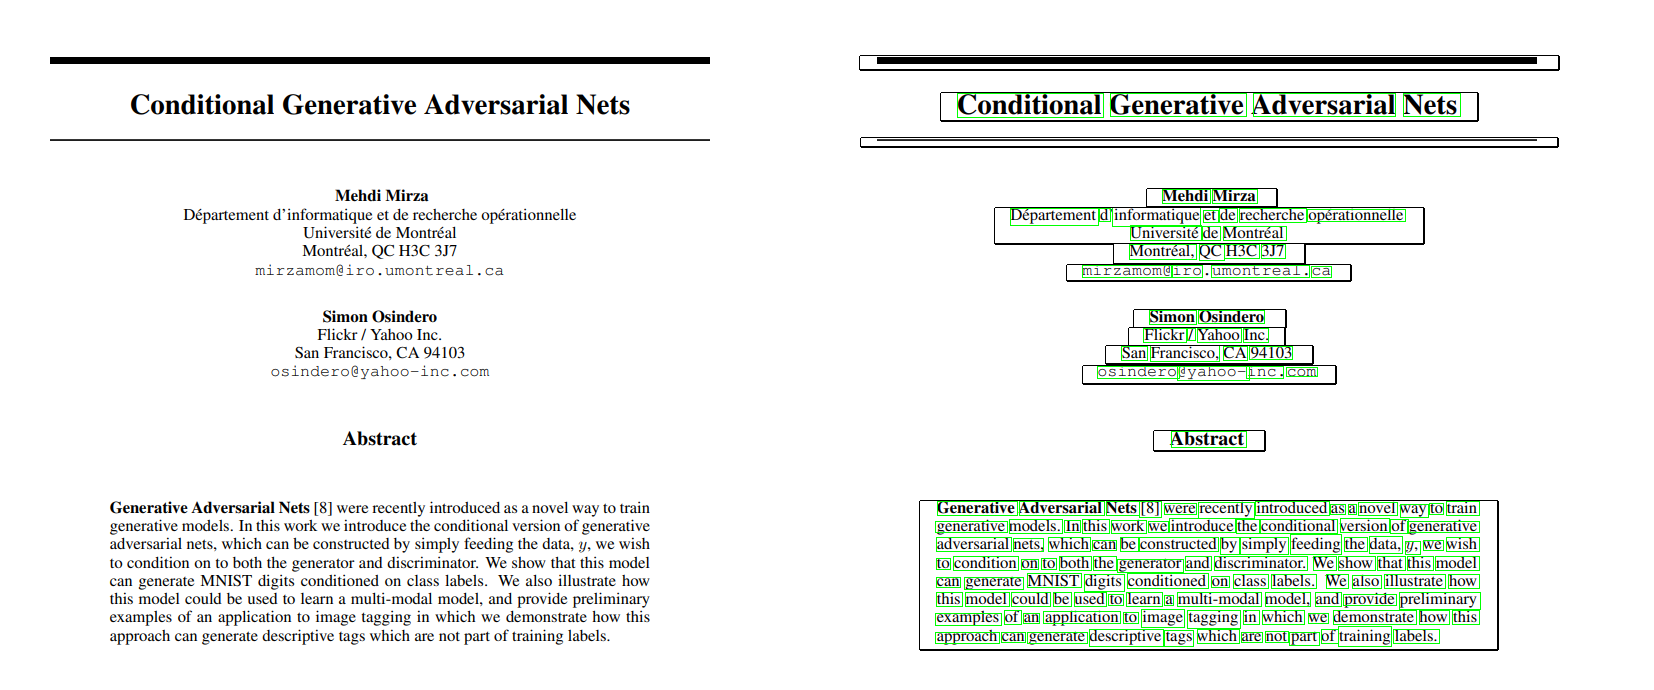

In [ ]:
#Với mỗi contours tìm được ở trên, detect text có trong contour
for i in range(len(cnts)):
  x,y,w,h = cv2.boundingRect(cnts[i])
  img_text_detect = detect_text_keras(images[i], prediction_groups[i])
  img_detect_cnts[y:y+h,x:x+w] = img_text_detect

cv2_imshow( np.hstack((image, img_detect_cnts)) )

In [ ]:
#Hàm sort text in block line
def sort_text_line(line):

  #Duyệt sắp xếp các text theo thứ tự từ trên xuống
  for i in range(0, len(line) - 1):
    for j in range(i + 1, len(line)):
        if (line[i][1][0][1] > line[j][1][0][1]):
            # Hoán đổi vị trí
            tmp = line[i]
            line[i] = line[j]
            line[j] = tmp


  #Duyệt sắp xếp các text theo thứ tự từ trái sang phải
  for i in range(0, len(line) - 1):
      for j in range(i + 1, len(line)):
          if (line[i][1][0][0] > line[j][1][0][0] and abs(line[i][1][0][1] - line[j][1][0][1]) < 7):
              # Hoán đổi vị trí
              tmp = line[i]
              line[i] = line[j]
              line[j] = tmp
  return line

In [ ]:
#Hàm đưa về dạng text
def text_format(prediction_groups):

  #Khởi tạo mảng text để trả về
  result = []
  for line in prediction_groups:
    line = sort_text_line(line)
    temp = ""
    for text in line:
      temp = temp + " " + text[0] 
    result.append(temp)
  return result

In [ ]:
#Hiển thị kết quả và viết file output_keras.txt
result = text_format(prediction_groups)
file_name = 'output_keras.txt'
write_txt(result, file_name)
for line in result:
  print(line)


 conditional generative adversarial nets

 mehdi mirza
 departement d informatique et de recherche operationnelle universite de montreal
 montreal qc h3c 3j7
 mirzamome iro umontreall ca
 simon osindero
 flickr l yahoo inc
 san franciscos ca 94103
 osindero cyahoor incs com
 abstract
 generative adversarial nets 181 were recently introduced as a novel way to train generative models in this work we introduce the conditional version of generative adversarial nets which can be constructed by simply feeding the data y we wish to condition on to both the generator and discriminator we show that this model can generate mnist digits conditioned on class labels we also illustrate how this model could be used to learn a multimodal model and provide preliminary examples of an application to image tagging in which we demonstrate how this approach can generate descriptive tags which are not part of training labels


## Accuracy Metric

### Define hàm tính độ chính xác bằng độ đo word

In [ ]:
## Hàm tính độ chính xác bằng độ đo accuracy dựa trên word
def accuracy(pred, test):

  #Word có trong cả hai text
  TP = [value for value in pred if value in test]  

  #Word có trong pred nhưng không có trong test
  FP = [value for value in pred if value not in test] 

  #Word có trong test nhưng không có trong pred
  FN = [value for value in test if value not in pred] 

  #Đếm số lượng từ sai
  countFP = 0
  for key in FP:
    countFP += pred[key]

  count_FN = 0
  for key in FN:
    count_FN += test[key]
  
  #Đếm số lượng từ đúng
  count_test = 0
  count_pred = 0
  for key in TP:
    count_pred += pred[key]
    count_test += test[key]
  
  #Số lượng pred > test -> FP
  if (count_pred > count_test):
    countFP += count_pred - count_test
  #Số lượng test > pred -> FN
  elif (count_pred < count_test):
    count_FN += count_test - count_pred 

  countTP = min(count_pred, count_test)
  return countTP/(countTP + countFP + count_FN)

In [ ]:
#Hàm đưa txt thành dạng string
def txt_to_string(text):
  result = ''
  for i in text:
    for j in i:
      result += j
  return result.replace("\n", "").lower().strip()

In [ ]:
import string
import re

#Hàm tạo dictionary word từ chuỗi đầu vào
def find_word_frequency(txt):
  #Tạo pattern gồm các ký tự đặc biệt từ thư viện string
  pattern = r'[' + string.punctuation + ']'

  #Loại bỏ các ký tự đặc biệt khỏi chuỗi và ngắt từ theo khoảng trắng
  temp = re.sub(pattern, '', txt).split(' ')

  #Tạo word frequency
  word_frequency={}
  for word in temp:
      if word in word_frequency:
          word_frequency[word]+=1     
      else:
          word_frequency[word]=1
  
  return word_frequency

### Đánh giá độ chính xác output Pytesseract

In [ ]:
#Xử lí văn bản đầu vào
#Đọc file testcase1.txt chứa đoạn văn bản trong hình ảnh
testcase = open('/content/output_testcase.txt', "r") 
tesseract = open('/content/output_tesseract.txt', "r") 

#Khởi tạo một chuỗi rỗng và lưu đoạn văn dưới dạng 1 chuỗi duy nhất
txt_testcase = txt_to_string(testcase)
txt_tesseract = txt_to_string(tesseract)

txt_testcase_fre = find_word_frequency(txt_testcase)
txt_tesseract_fre =  find_word_frequency(txt_tesseract)


print('Accuracy=',accuracy(txt_testcase_fre,txt_tesseract_fre))

Accuracy= 0.987012987012987


In [ ]:
#Tính độ tương đồng output (Trên ký tự character)
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

print('Similar=', similar(txt_testcase,txt_tesseract))

Similar= 0.9989212513484358


### Đánh giá độ chính xác output Keras

In [ ]:
#Xử lí văn bản đầu vào
#Đọc file testcase1.txt chứa đoạn văn bản trong hình ảnh
keras = open('/content/output_keras.txt', "r") 

#Khởi tạo một chuỗi rỗng và lưu đoạn văn dưới dạng 1 chuỗi duy nhất
txt_keras = txt_to_string(keras)

txt_keras_fre =  find_word_frequency(txt_keras)


print('Accuracy=',accuracy(txt_testcase_fre,txt_keras_fre))

Accuracy= 0.8165680473372781


In [ ]:
#Tính độ tương đồng output (Trên ký tự character)
print('Similar=', similar(txt_testcase,txt_keras))

Similar= 0.8002171552660152
